In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from scipy.spatial import distance

In [4]:
#Import train data
train  = pd.read_csv('trainKNN.txt',header=None)
train.columns = ["Id number", "RI", "Na", "Mg", "Al", "Si","K","Ca","Ba",'Fe','Type of glass']
train

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
191,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
192,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
193,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
194,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


In [5]:
#Import Test data
test  = pd.read_csv('testKNN.txt',header=None)
test.columns = ["Id number", "RI", "Na", "Mg", "Al", "Si","K","Ca","Ba",'Fe','Type of glass']
test

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2
5,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
6,161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3
7,162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
8,163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
9,174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5


In [6]:
train.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [7]:
test.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [9]:
train.duplicated().sum()

0

In [10]:
test.duplicated().sum()

0

In [ ]:
#remove unwanted datas
train = train.drop(columns='Id number')
test = test.drop(columns='Id number')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


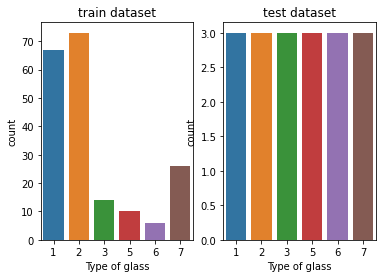

In [21]:
# Analysis of Distribution in Categorical dependent Variable
f,axes = plt.subplots(1, 2)
sns.countplot(train['Type of glass'], ax=axes[0]).set(title='train dataset')
sns.countplot(test['Type of glass'],ax=axes[1]).set(title='test dataset')
plt.show()

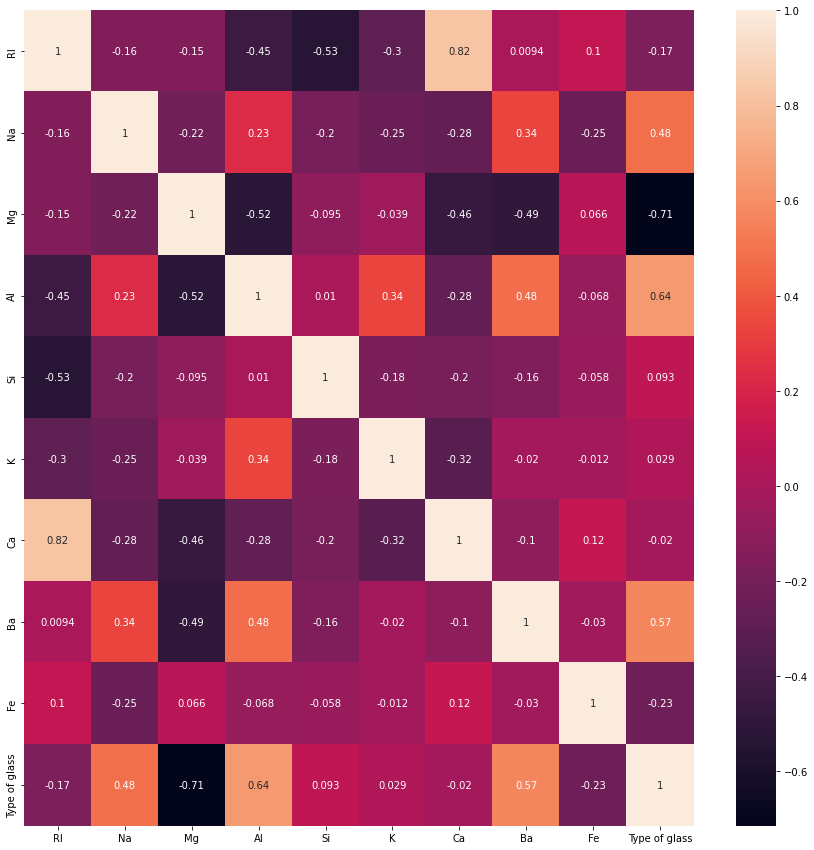

In [38]:
coreleation= train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(coreleation,annot=True)
plt.show()

In [51]:
x_train = train.drop(columns = ['Type of glass']).values
y_train = train['Type of glass'].values

x_test = test.drop(columns = ['Type of glass']).values
y_test = test['Type of glass'].values

In [56]:
#standardization of data
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [71]:
#Fitting into model
euclid_model = KNeighborsClassifier(n_neighbors=8, metric=distance.sqeuclidean)
manhattan_model = KNeighborsClassifier(n_neighbors=8, metric=distance.cityblock)
euclid_model.fit(x_train,y_train) 
manhattan_model.fit(x_train, y_train)

KNeighborsClassifier(metric=<function cityblock at 0x7f533e4d1f80>,
                     n_neighbors=8)

In [72]:
# Make predictions
manhattan_predictions = manhattan_model.predict(x_test)
euclid_predictions = euclid_model.predict(x_test) 
df = pd.DataFrame({'actual': y_test, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
0,1,1,1
1,1,1,1
2,1,1,1
3,2,2,2
4,2,1,1


In [76]:
#Performance and classification report of Manhattan Distance
ac = accuracy_score(y_test, manhattan_predictions)
print("Accuracy Score of KNN with Manhattan Distance: {:.2f} ".format(ac))

print(classification_report(y_test,manhattan_predictions))

Accuracy Score of KNN with Manhattan Distance: 0.50 
              precision    recall  f1-score   support

           1       0.43      1.00      0.60         3
           2       0.33      0.67      0.44         3
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy                           0.50        18
   macro avg       0.42      0.50      0.40        18
weighted avg       0.42      0.50      0.40        18



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
#Performance and classification report of Euclidean Distance
ac = accuracy_score(y_test, euclid_predictions)
print("Accuracy Score of KNN with Manhattan Distance: {:.2f} ".format(ac))

print(classification_report(y_test,euclid_predictions))

Accuracy Score of KNN with Manhattan Distance: 0.61 
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       0.29      0.67      0.40         3
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      0.67      0.80         3
           7       0.75      1.00      0.86         3

    accuracy                           0.61        18
   macro avg       0.63      0.61      0.57        18
weighted avg       0.63      0.61      0.57        18



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
